In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [7]:
vd = read.table('videodata.txt', header=1)
head(vd, 3)

time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
2,3,3,2,0,1,0,19,1,0,10,1,0,1,4
0,3,3,3,0,0,0,18,1,1,0,1,1,1,2
0,3,1,3,0,0,1,19,1,0,0,1,0,1,3


In [8]:
vm = read.table('videoMultiple.txt', header=1)
# head(vm, 3)

Scenario 1: Begin by providing an estimate for the fraction of students who played a video game in the week prior to the survey. Provide an interval estimate as well as a point estimate for this proportion.

In [65]:
# finding a 95% interval estimate and a point estimate
# for students who played any amount of videogames in past week
did_play_in_week_prior <- vd$time>0
total_students = nrow(vd)
n <- total_students;
standard_deviation <- sd(did_play_in_week_prior);
standard_error_of_mean <- standard_deviation/sqrt(n);
margin_of_error = qnorm(.975)*standard_error_of_mean;
m = mean(did_play_in_week_prior)
"95% interval estimate"
m + c(-margin_of_error, margin_of_error)
"point estimate"
m

[1] "95% interval estimate"

[1] 0.2736811 0.4735717

[1] "point estimate"

[1] 0.3736264

Scenario 2: Check to see how the amount of time spent playing videogames in the week prior to the survey compares to the reported frequency of play (daily, weekly, etc.) How might the fact that there was an exam in the week prior to the survey affect your previous estimates and this comparison?

In [75]:
# finding a 95% interval estimate and a point estimate
# for students who reported to play videogames daily or weekly
filtered = vd[vd$freq!=99,]
reported_daily_or_weekly <- filtered$freq<3
n <- length(reported_daily_or_weekly)
m <- mean(reported_daily_or_weekly)
standard_deviation <- sd(reported_daily_or_weekly);
standard_error_of_mean <- standard_deviation/sqrt(n);
margin_of_error = qnorm(.975)*standard_error_of_mean;
"95% interval estimate"
m + c(-margin_of_error, margin_of_error)
"point estimate"
m

[1] "95% interval estimate"

[1] 0.3628266 0.5858913

[1] "point estimate"

[1] 0.474359

Scenario 3: Consider making an interval estimate for the average amount of time spent playing videogames in the week prior to the survey. Keep in mind the overall shape of the sample distribution. A simulation study may help determine the appropriateness of an interval estimate.

In [77]:
# finding a 95% interval estimate and a point estimate
# for students who played any amount of videogames in past week
total_students = nrow(vd)
n <- total_students;
standard_deviation <- sd(vd$time);
standard_error_of_mean <- standard_deviation/sqrt(n);
margin_of_error = qnorm(.975)*standard_error_of_mean;
m = mean(vd$time)
"95% interval estimate"
m + c(-margin_of_error, margin_of_error)

[1] "95% interval estimate"

[1] 0.4668263 2.0188880

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


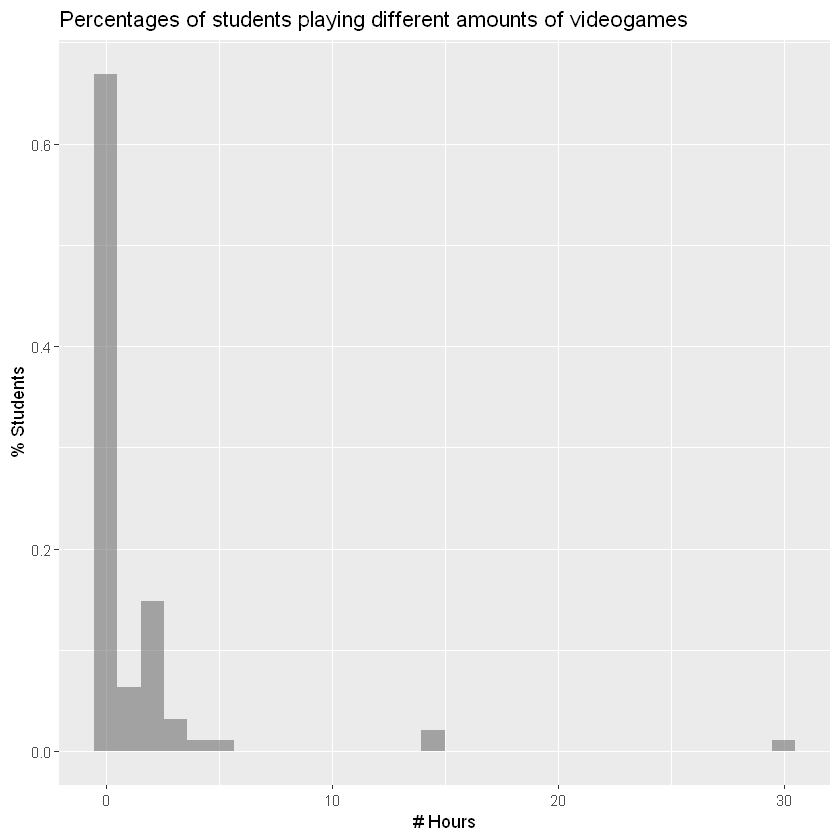

In [88]:
p = ggplot(vd, aes(time)) + 
    geom_histogram(alpha=.5, aes(y=..density..), position='identity')
p + labs(title="Percentages of students playing different amounts of videogames",
        x="# Hours",
        y="% Students")

Scenario 4: Next, consider the "attitude" questions. In general, do you think the students enjoy playing videogames? If you had to make a short list of the most important reasons why students like/dislike videogames, what would you put on the list? Don't forget that those students who say that they have never played videogames or do not at all like videogames are asked to skip over some of these questions. So, there may be many nonrespondents to the questions as to whether they think videogames are educational, where they play videogames, etc.

In [130]:
cat("total # students:", nrow(vd), "\n")
likers <- vd[vd$like==2|vd$like==3,]
dislikers <- vd[vd$like!=2&vd$like!=3,]
cat("students very much or somewhat liking videogames:", nrow(likers), "\n")

"0 is female, 1 is male"
cat("of students who like videogames, mean sex:", mean(likers$sex), "\n")
cat("of other students, mean sex:", mean(dislikers$sex), "\n")

total # students: 91 
students very much or somewhat liking videogames: 69 


[1] "0 is female, 1 is male"

of students who like videogames, mean sex: 0.6231884 
of other students, mean sex: 0.4545455 


In [137]:
mean(likers[likers$work != 99,]$work)
mean(dislikers[dislikers$work != 99,]$work)

[1] 8.045455

[1] 5.272727

In [138]:
dislikers$where

[1]  3 99 99 99  3  3  3  2  3 99 99 99 99  3  3 99  2  2 99 99 99 99

In [108]:
likers

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
1,2.0,3,3,2,0,1,0,19,1,0,10,1,0,1,4
2,0.0,3,3,3,0,0,0,18,1,1,0,1,1,1,2
3,0.0,3,1,3,0,0,1,19,1,0,0,1,0,1,3
4,0.5,3,3,3,0,1,0,19,1,0,0,1,0,1,3
5,0.0,3,3,4,0,1,0,19,1,1,0,0,0,1,3
6,0.0,3,2,4,0,0,1,19,0,0,12,0,0,0,3
8,0.0,3,3,4,0,0,0,19,1,0,13,0,0,1,3
9,2.0,3,2,1,1,1,1,19,0,0,0,0,0,0,4
10,0.0,3,3,4,0,1,1,19,1,1,0,1,0,1,4
11,0.0,3,1,4,0,0,0,20,1,0,0,1,0,0,3
